In [18]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv(r"C:\Users\StudBuoy\Downloads\climate-change-earth-surface-temperature-data\GlobalTemperatures.csv")

In [5]:
data.keys()

Index(['dt', 'LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],
      dtype='object')

In [6]:
datac=data.drop(['LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty'],axis=1)

In [8]:
datac['temp']=datac['LandAverageTemperature']

In [13]:
datac=datac.drop(['LandAverageTemperature'],axis=1)

In [14]:
datac.dropna(inplace=True)

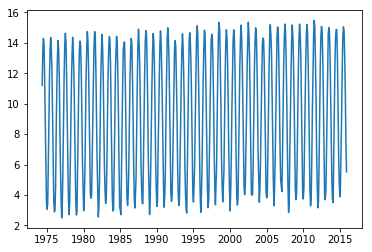

In [29]:
plt.plot(datac['dt'][-500:],datac['temp'][-500:])

In [22]:
datac['dt']=pd.to_datetime(datac['dt'])

In [36]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3180 entries, 1750-01-01 to 2015-12-01
Data columns (total 1 columns):
temp    3180 non-null float64
dtypes: float64(1)
memory usage: 49.7 KB


In [31]:
datac.describe()

,temp
count,3180.000000
mean,8.374731
std,4.381310
min,-2.080000
25%,4.312000
50%,8.610500
75%,12.548250
max,19.021000


In [33]:
datac=datac.set_index('dt')

In [37]:
new=datac[-1000:]

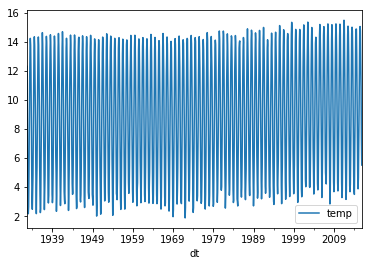

In [41]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20, 16

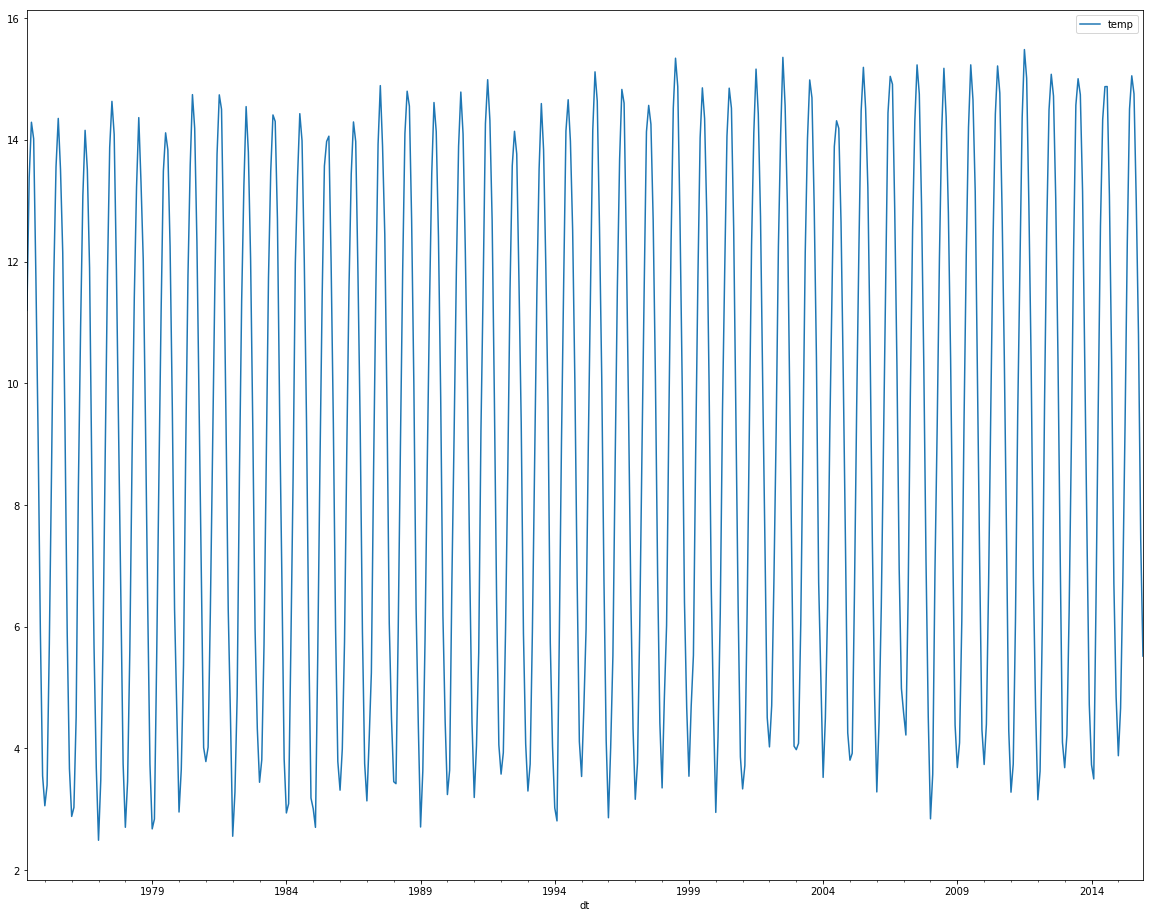

In [43]:
new[-500:].plot()

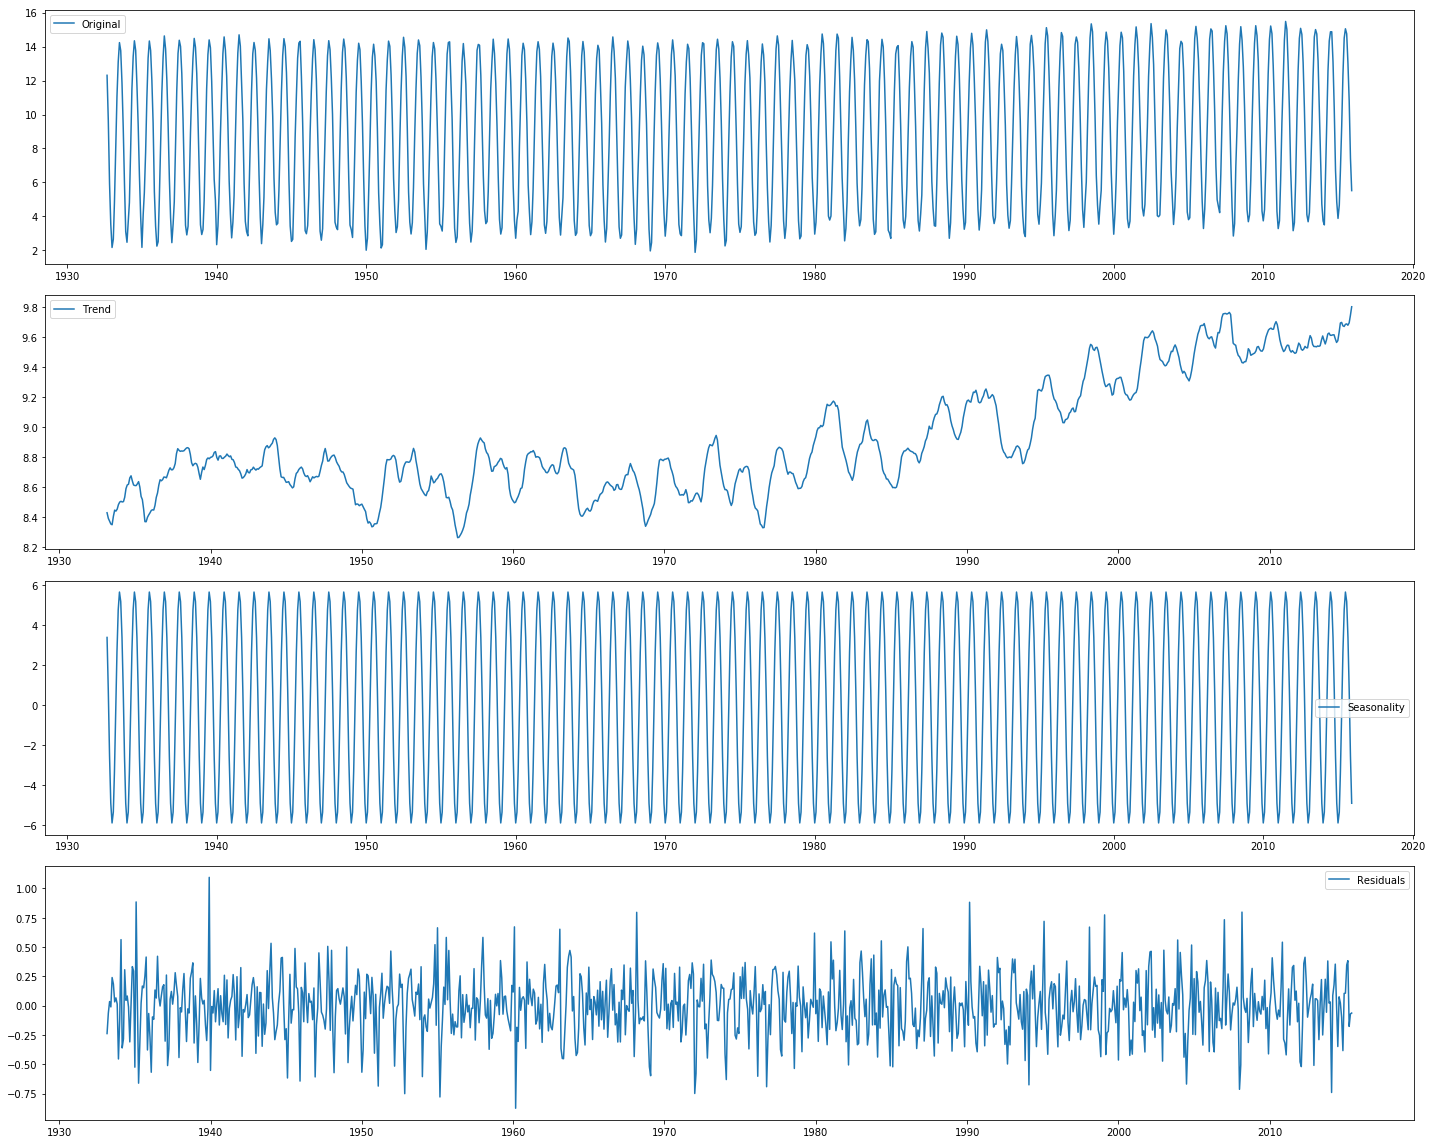

In [46]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(new)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(new, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [47]:
def TestStationaryAdfuller(ts, cutoff = 0.01):
    ts_test = adfuller(ts, autolag = 'AIC')
    ts_test_output = pd.Series(ts_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in ts_test[4].items():
        ts_test_output['Critical Value (%s)'%key] = value
    print(ts_test_output)
    
    if ts_test[1] <= cutoff:
        print("Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary")
    else:
        print("Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [49]:
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

In [66]:
new=new.iloc[:,0]

In [67]:
TestStationaryAdfuller(new)

Test Statistic                  -1.155765
p-value                          0.692329
#Lags Used                      22.000000
Number of Observations Used    977.000000
Critical Value (1%)             -3.437061
Critical Value (5%)             -2.864503
Critical Value (10%)            -2.568348
dtype: float64
Weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [68]:
newav=new.rolling(12).mean()

In [69]:
newav=new-newav

In [70]:
newav.dropna(inplace=True)

In [71]:
TestStationaryAdfuller(newav)

Test Statistic                -8.209629e+00
p-value                        6.874169e-13
#Lags Used                     2.200000e+01
Number of Observations Used    9.660000e+02
Critical Value (1%)           -3.437138e+00
Critical Value (5%)           -2.864537e+00
Critical Value (10%)          -2.568366e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [72]:
newdiff=new-new.shift(1)

In [74]:
newdiff.dropna(inplace=True)

In [75]:
TestStationaryAdfuller(newdiff)

Test Statistic                -1.492340e+01
p-value                        1.400668e-27
#Lags Used                     2.200000e+01
Number of Observations Used    9.760000e+02
Critical Value (1%)           -3.437068e+00
Critical Value (5%)           -2.864506e+00
Critical Value (10%)          -2.568349e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [76]:
newse=new-new.shift(12)

In [77]:
newse.dropna(inplace=True)

In [78]:
TestStationaryAdfuller(newse)

Test Statistic                -1.072695e+01
p-value                        3.048250e-19
#Lags Used                     1.300000e+01
Number of Observations Used    9.740000e+02
Critical Value (1%)           -3.437082e+00
Critical Value (5%)           -2.864512e+00
Critical Value (10%)          -2.568352e+00
dtype: float64
Strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root, hence it is stationary


In [81]:
from statsmodels.tsa.stattools import acf, pacf
import numpy as np

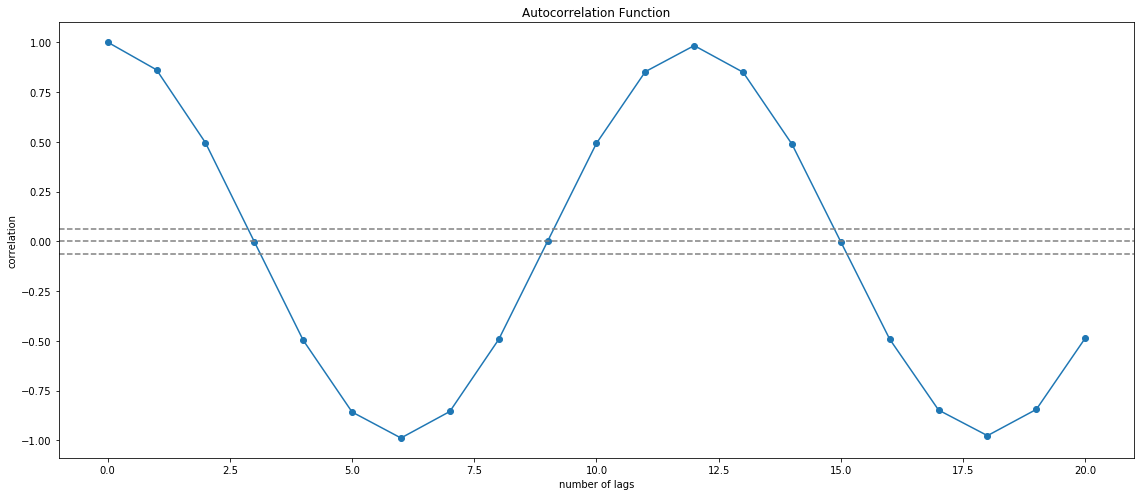

In [87]:
lag_acf = acf(newav, nlags=20)
plt.figure(figsize=(16, 7))
#Plot ACF: 
plt.plot(lag_acf, marker="o")
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(new)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(new)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')
plt.xlabel('number of lags')
plt.ylabel('correlation')
plt.tight_layout()

In [91]:
import itertools
import warnings
warnings.filterwarnings('ignore')

In [89]:
p = d = q = range(0, 2) # Define the p, d and q parameters to take any value between 0 and 2
pdq = list(itertools.product(p, d, q)) # Generate all different combinations of p, q and q triplets
pdq_x_QDQs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [95]:
mpar,mspar=None,None
minaic=100000
for param in pdq:
    for seasonal_param in pdq_x_QDQs:
            mod = sm.tsa.SARIMAX(new,
                                            order=param,
                                            seasonal_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            if minaic>results.aic:
                mpar=param
                mspar=seasonal_param
                minaic=results.aic
print("{}:{}:{}".format(mpar,mspar,minaic))                

(1, 1, 1):(0, 1, 1, 12):420.28974623854515


In [96]:
mod = sm.tsa.SARIMAX(new, 
                                order=(1,1,1), 
                                seasonal_order=(0,1,1,12),   
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               temp   No. Observations:                 1000
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -206.145
Date:                            Mon, 10 Jun 2019   AIC                            420.290
Time:                                    15:02:24   BIC                            439.811
Sample:                                09-01-1932   HQIC                           427.719
                                     - 12-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3059      0.032      9.490      0.000       0.243       0.369
ma.L1         -0.9491      0.012   

In [108]:
fore=results.get_forecast(steps=500)

In [101]:
from pandas import DataFrame

In [109]:
foremean=DataFrame(fore.predicted_mean)

In [110]:
forecast_ci = fore.conf_int()

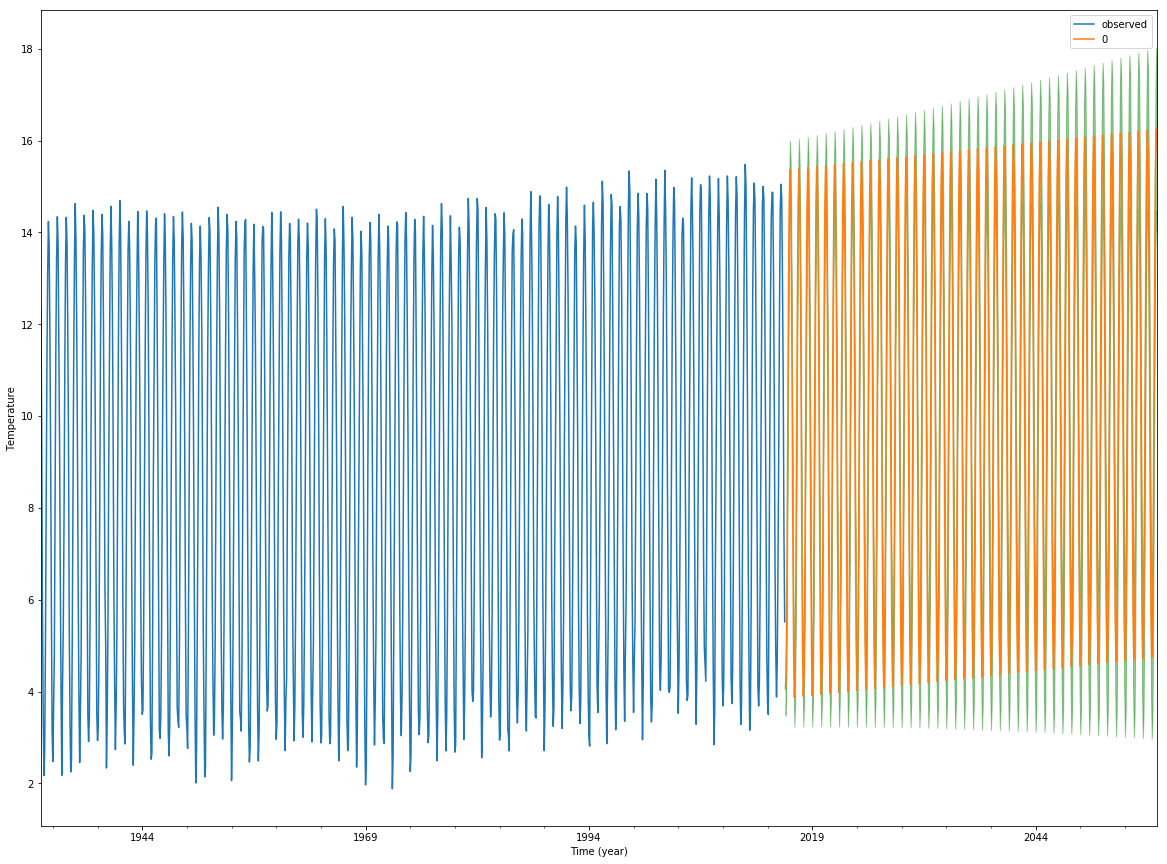

In [111]:
ax = new.plot(label='observed', figsize=(20, 15))
foremean.plot(ax=ax, label='Forecast')
ax.fill_between(forecast_ci.index,
                forecast_ci.iloc[:, 0],
                forecast_ci.iloc[:, 1], color='g', alpha=.4)
ax.set_xlabel('Time (year)')
ax.set_ylabel('Temperature')

plt.legend()
plt.show()